In [1]:
from matgen.base import CellComplex
from matgen import matutils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
from tqdm import tqdm 

# First example

In [169]:
# Load cell complex from a `.tess` file
filename = 'tests/test_data/pass1_model_2d.txt'
c = CellComplex.from_tess_file(
    filename, 
    with_theta = True, 
    theta_file = 'tests/test_data/pass_1_misorientation.txt',
    lower_thrd = 15)
print(c)

Complex loaded: 0.1 s
<class CellComplex> 2D
3166 vertices
4747 edges
1582 faces


In [170]:
spec_edges = []
non_spec_edges = []
spec_vert = []
non_spec_vert = []

edges = []
for face in c._three_sided_grains.values():
    boundaries_set = set()
    for v in c.get_many('v', face.v_ids):
        boundaries_set.update(v.incident_ids)
        if v.junction_type >= 2:
            spec_vert.append(v.id)
        else:
            non_spec_vert.append(v.id)
    edges += list(boundaries_set)
for edge_id in edges:
    if c.get_one('e', edge_id).is_special:
        spec_edges.append(edge_id)
    else:
        non_spec_edges.append(edge_id)

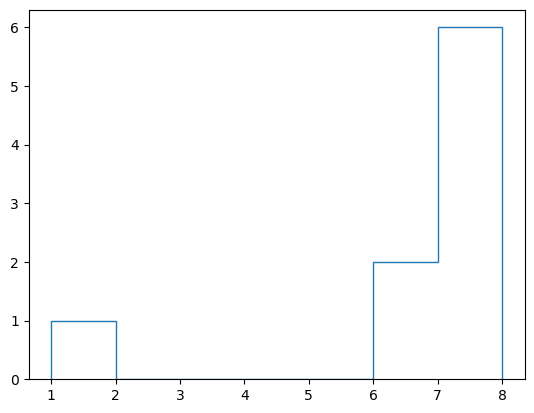

In [173]:
types = []
for face in c._three_sided_grains.values():
    types.append(face.three_sided_type)
plt.hist(types, histtype='step', bins=7)
plt.show()

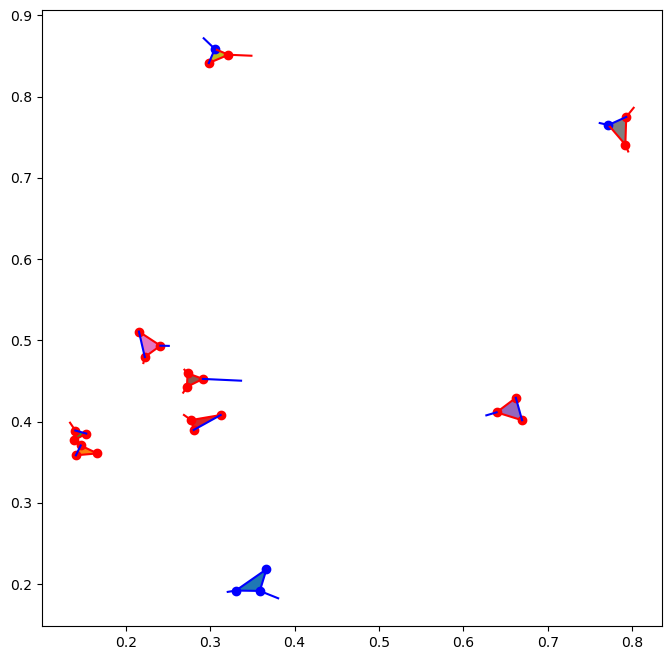

In [174]:
ax = c.plot_faces(c._three_sided_grains.keys())
c.plot_edges(spec_edges, ax=ax, color='r')
c.plot_edges(non_spec_edges, ax=ax, color='b')
c.plot_vertices(spec_vert, ax=ax, color='r')
c.plot_vertices(non_spec_vert, ax=ax, color='b')
plt.show()

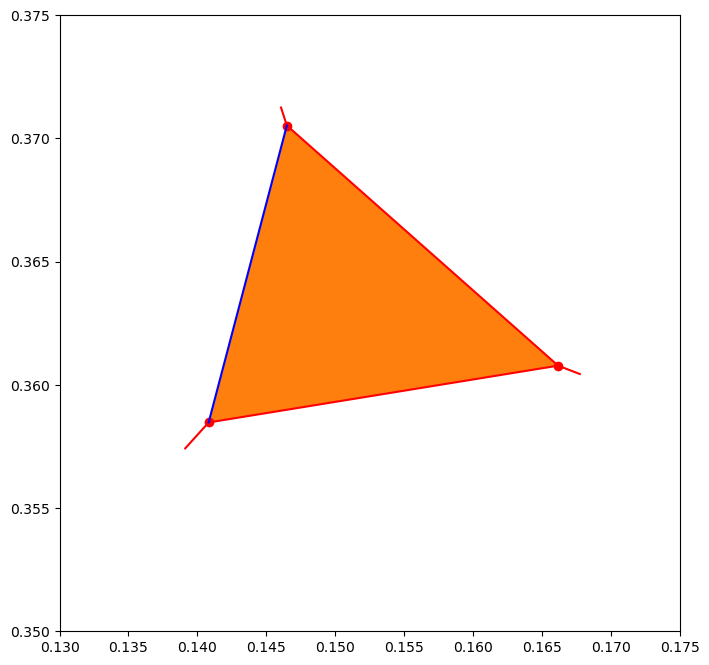

In [175]:
ax = c.plot_faces(c._three_sided_grains.keys())#, labels=True)
c.plot_edges(spec_edges, ax=ax, color='r')
c.plot_edges(non_spec_edges, ax=ax, color='b')
c.plot_vertices(spec_vert, ax=ax, color='r')
c.plot_vertices(non_spec_vert, ax=ax, color='b')
ax.set_xlim([0.13, 0.175])
ax.set_ylim([0.35, 0.375])
plt.show()

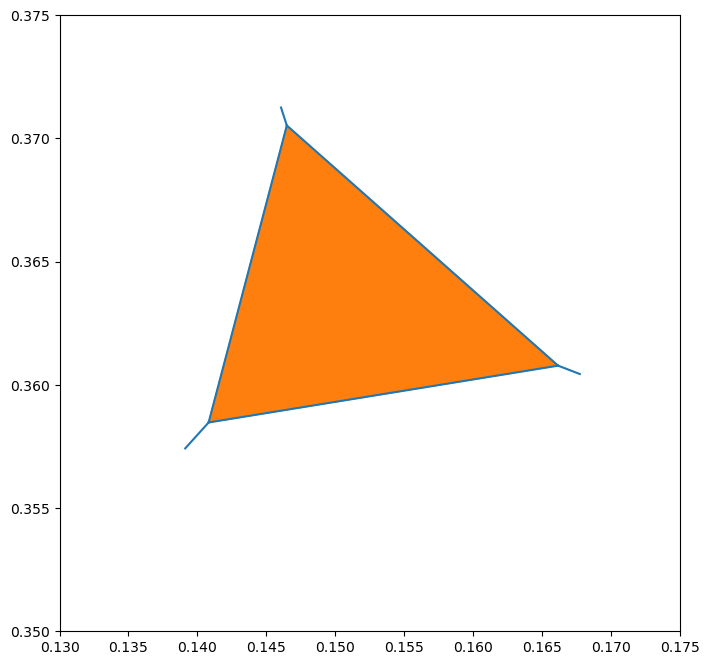

In [22]:
ax = c.plot_faces(c._three_sided_grains.keys(), c='C1')
c.plot_edges(edges, ax=ax, color='C0')
ax.set_xlim([0.13, 0.175])
ax.set_ylim([0.35, 0.375])
plt.show()

# Experimantal Data (ECAP)

In [5]:
filenames = [
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/pass4.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/pass8.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr_005Y/Neper_Cu_01Cr_01Zr_005Y/pass4/pass4.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_01Cr_01Zr_005Y/Neper_Cu_01Cr_01Zr_005Y/pass8/pass8.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_03Cr_05Zr/Neper_Cu_03Cr_05Zr/pass1/pass1_3.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_03Cr_05Zr/Neper_Cu_03Cr_05Zr/pass4/pass4_3.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_Mg_high_temperature_ECAP/Neper_Cu-Mg/pass1/pass1_4.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_Mg_high_temperature_ECAP/Neper_Cu-Mg/pass2/pass2.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_Mg_high_temperature_ECAP/Neper_Cu-Mg/pass4/pass4.tess',
    '/Users/v94623eb2/Documents/ExpDataAnalysis/Experimental_Data/ECAP2022/Cu_Mg_high_temperature_ECAP/Neper_Cu-Mg/pass8/pass8.tess'
]

alloys = [
    'Cu_01Cr_01Zr',
    'Cu_01Cr_01Zr',
    'Cu_01Cr_01Zr',
    'Cu_01Cr_01Zr_005Y',
    'Cu_01Cr_01Zr_005Y',
    'Cu_03Cr_05Zr',
    'Cu_03Cr_05Zr',
    'Cu_Mg',
    'Cu_Mg',
    'Cu_Mg',
    'Cu_Mg'    
]

passes = [
    'pass1',
    'pass4',
    'pass8',
    'pass4',
    'pass8',
    'pass1',
    'pass4',
    'pass1',
    'pass2',
    'pass4',
    'pass8'
]

In [6]:
fractions = {ij: [] for ij in range(11)}
Ns = []
for filename in tqdm(filenames):
    c = CellComplex.from_tess_file(filename)
    
    c.set_theta_from_ori(lower_thrd=15)
    c.set_junction_types()
    c.set_three_sided_types()
    
    N = len(c._three_sided_grains)
    Ns.append(N)
    for k, v in c.get_three_sided_distribution().items():
        fractions[k].append(round(v / N, 3))

100%|███████████████████████████████████████████| 11/11 [06:41<00:00, 36.52s/it]


In [7]:
fractions['filename'] = filenames
fractions['alloy'] = alloys
fractions['pass'] = passes
fractions['N_3sided'] = Ns

In [8]:
df = pd.DataFrame(fractions)

In [9]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'filename', 'alloy', 'pass',
       'N_3sided'],
      dtype='object')

In [10]:
df2 = df[['filename', 'alloy', 'pass', 'N_3sided', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [11]:
df2['name'] = df2['alloy'] + '/' + df2['pass']

/var/folders/dm/3c74fryd1kjcb2qk_vwmg8000000gr/T/ipykernel_45746/908908099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['name'] = df2['alloy'] + '/' + df2['pass']


In [12]:
qs = np.array([0.23548, 0.40613, 0.03843, 0.19442, 0.17373, 0.08284, 0.04261, 0.29214, 0.28295, 0.13798, 0.0873])
ps = 1 - qs
ps

array([0.76452, 0.59387, 0.96157, 0.80558, 0.82627, 0.91716, 0.95739,
       0.70786, 0.71705, 0.86202, 0.9127 ])

In [14]:
df2['p'] = ps.round(3)

/var/folders/dm/3c74fryd1kjcb2qk_vwmg8000000gr/T/ipykernel_45746/2731231775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p'] = ps.round(3)


In [15]:
df3 = df2[['name', 'p', 'N_3sided', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [16]:
df3.to_csv('3sided_upd.txt', sep=' ', index= False)

In [17]:
df3

,name,p,N_3sided,0,1,2,3,4,5,6,7,8,9,10
0,Cu_01Cr_01Zr/pass1,0.765,23,0.043,0.000,0.000,0.043,0.043,0.087,0.000,0.087,0.043,0.478,0.174
1,Cu_01Cr_01Zr/pass4,0.594,107,0.131,0.009,0.019,0.009,0.000,0.280,0.000,0.140,0.121,0.262,0.028
2,Cu_01Cr_01Zr/pass8,0.962,43,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.279,0.721
3,Cu_01Cr_01Zr_005Y/pass4,0.806,15,0.000,0.000,0.000,0.000,0.000,0.067,0.067,0.067,0.133,0.333,0.333
4,Cu_01Cr_01Zr_005Y/pass8,0.826,2,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.500,0.000
5,Cu_03Cr_05Zr/pass1,0.917,3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.333,0.333
6,Cu_03Cr_05Zr/pass4,0.957,60,0.000,0.000,0.000,0.000,0.000,0.017,0.000,0.017,0.000,0.183,0.783
7,Cu_Mg/pass1,0.708,15,0.000,0.067,0.000,0.000,0.000,0.067,0.067,0.200,0.133,0.467,0.000
8,Cu_Mg/pass2,0.717,12,0.000,0.083,0.083,0.000,0.000,0.250,0.083,0.083,0.083,0.333,0.000
9,Cu_Mg/pass4,0.862,75,0.000,0.000,0.000,0.000,0.000,0.040,0.027,0.027,0.067,0.360,0.480


In [98]:
df3

,name,N_3sided,0,1,2,3,4,5,6,7,8,9,10,p
0,Cu_01Cr_01Zr/pass1,23,0.043,0.000,0.000,0.043,0.043,0.087,0.087,0.043,0.478,0.174,0.0,0.765
1,Cu_01Cr_01Zr/pass4,107,0.131,0.009,0.019,0.009,0.000,0.280,0.140,0.121,0.262,0.028,0.0,0.594
2,Cu_01Cr_01Zr/pass8,43,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.279,0.721,0.0,0.962
3,Cu_01Cr_01Zr_005Y/pass4,15,0.000,0.000,0.000,0.000,0.000,0.067,0.133,0.133,0.333,0.333,0.0,0.806
4,Cu_01Cr_01Zr_005Y/pass8,2,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.500,0.000,0.0,0.826
5,Cu_03Cr_05Zr/pass1,3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.333,0.333,0.0,0.917
6,Cu_03Cr_05Zr/pass4,60,0.000,0.000,0.000,0.000,0.000,0.017,0.017,0.000,0.183,0.783,0.0,0.957
7,Cu_Mg/pass1,15,0.000,0.067,0.000,0.000,0.000,0.067,0.267,0.133,0.467,0.000,0.0,0.708
8,Cu_Mg/pass2,12,0.000,0.083,0.083,0.000,0.000,0.250,0.167,0.083,0.333,0.000,0.0,0.717
9,Cu_Mg/pass4,75,0.000,0.000,0.000,0.000,0.000,0.040,0.053,0.067,0.360,0.480,0.0,0.862


# Random case

In [18]:
Fij = {
    0: 1,
    1: 6,
    2: 3,
    3: 12,
    4: 4,
    5: 12,
    6: 4,
    7: 12,
    8: 3,
    9: 6,
    10: 1
}

ij = [
    (0, 0),
    (1, 0),
    (2, 0),
    (2, 1),
    (3, 1),
    (3, 2),
    (3, 3),
    (4, 3),
    (4, 4),
    (5, 4),
    (6, 4)
]

def _p6(p, i):
    return p**i * (1 - p)**(6 - i)


def Qij(p, i=None, j=None):
    if i is not None and j is not None:
        return Fij[i + j] * _p6(p, i)
    Q = []
    for _i, _j in ij:
        Q.append(Fij[_i + _j] * _p6(p, _i))
    return Q

In [20]:
p = np.linspace(0, 1, 51)

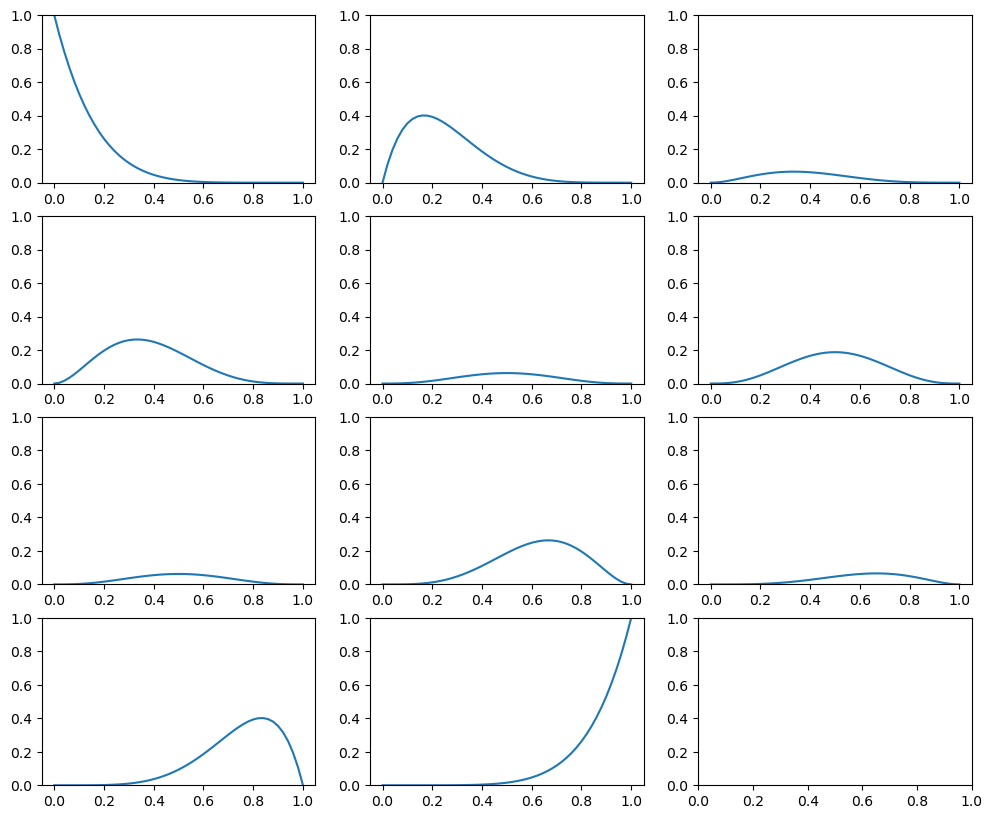

In [21]:
fig, axes = plt.subplots(4,3, figsize=(12,10))
axes[0][0].plot(p, Qij(p, 0, 0))
axes[0][1].plot(p, Qij(p, 1, 0))
axes[0][2].plot(p, Qij(p, 2, 0))
axes[1][0].plot(p, Qij(p, 2, 1))
axes[1][1].plot(p, Qij(p, 3, 1))
axes[1][2].plot(p, Qij(p, 3, 2))
axes[2][0].plot(p, Qij(p, 3, 3))
axes[2][1].plot(p, Qij(p, 4, 3))
axes[2][2].plot(p, Qij(p, 4, 4))
axes[3][0].plot(p, Qij(p, 5, 4))
axes[3][1].plot(p, Qij(p, 6, 4))
for i in range(4):
    for j in range(3):
        axes[i][j].set_ylim([0,1])
plt.ylim([0, 1])
plt.show()

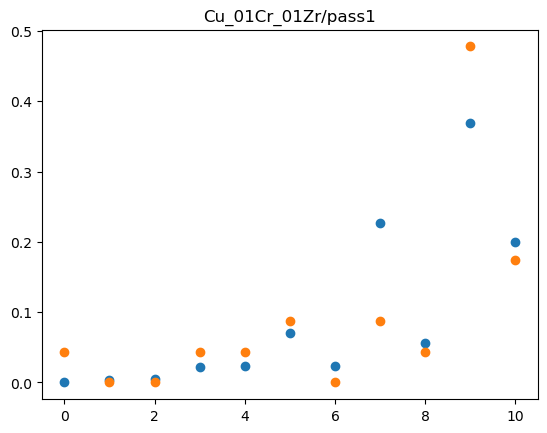

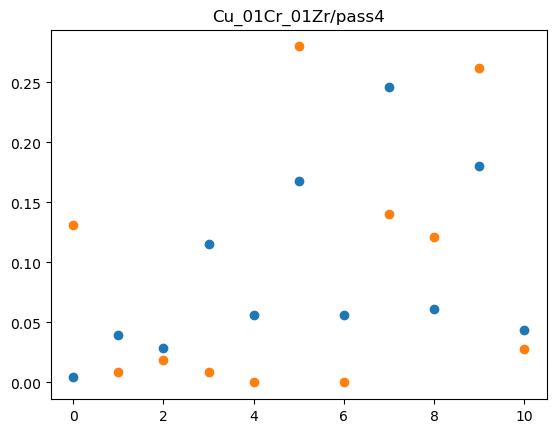

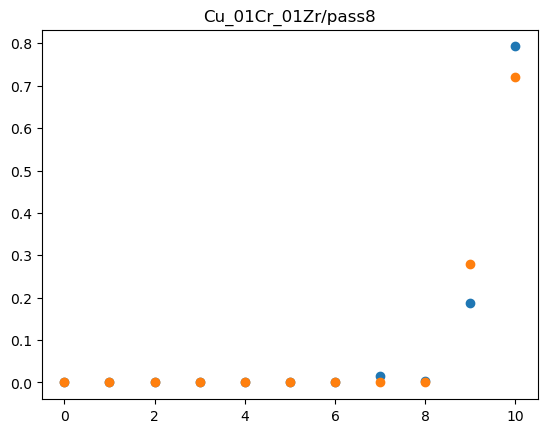

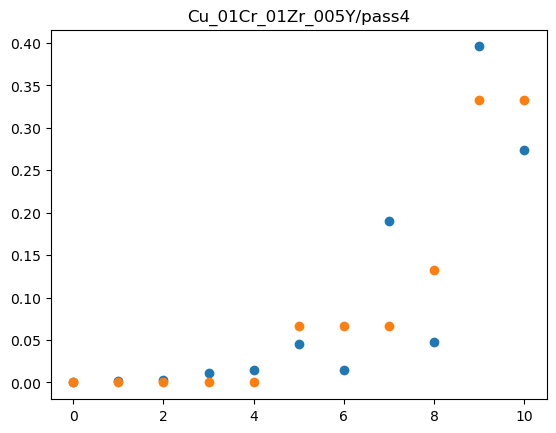

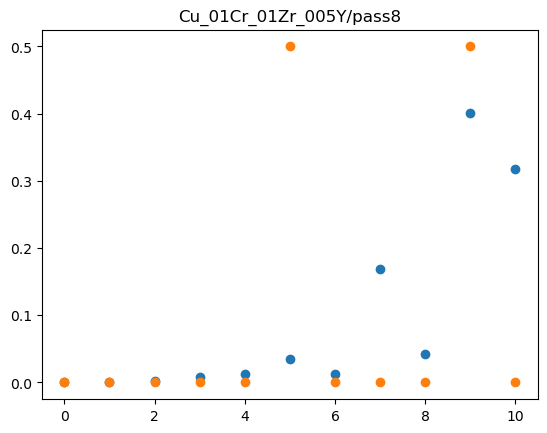

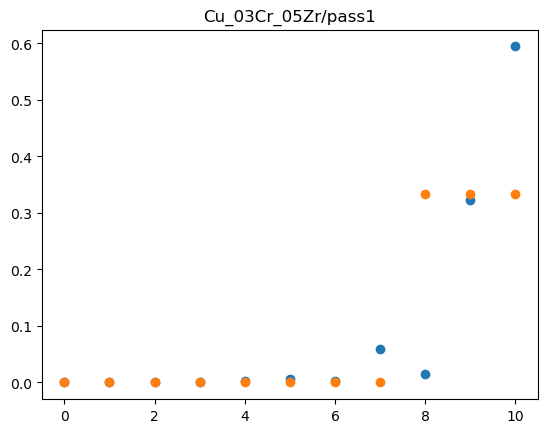

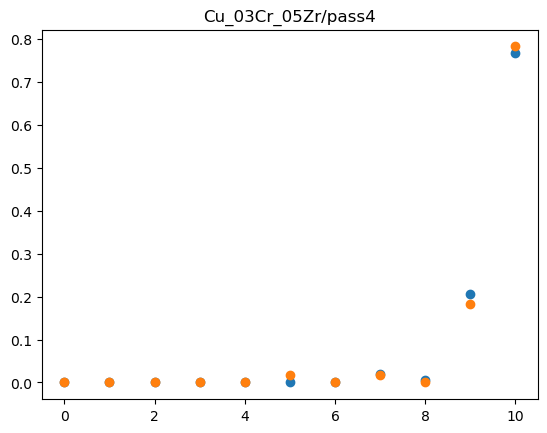

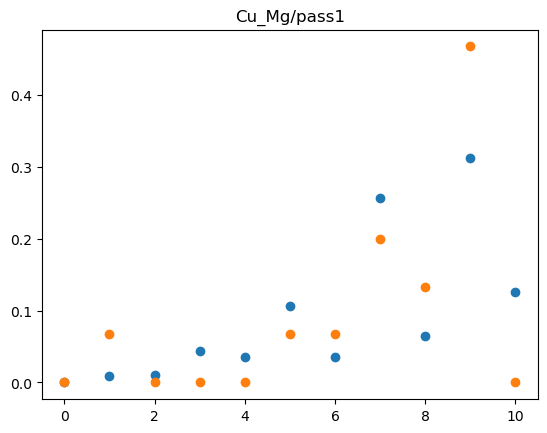

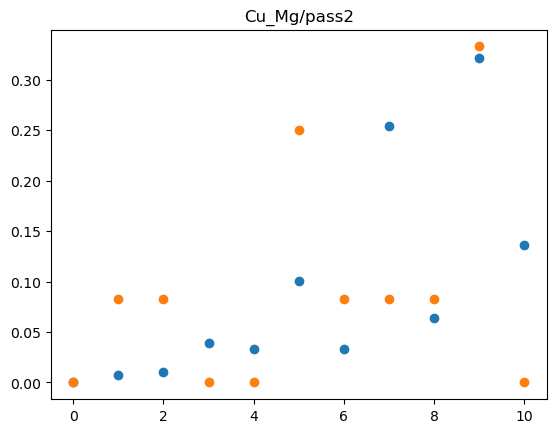

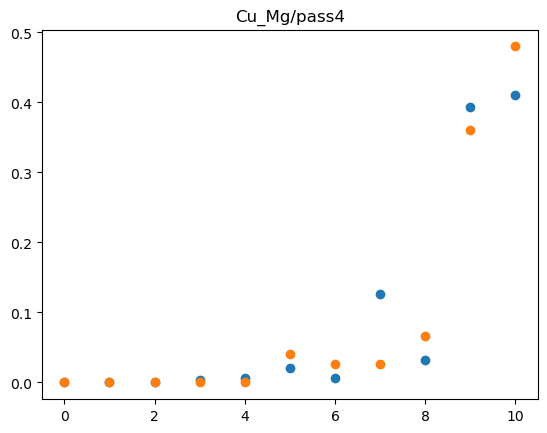

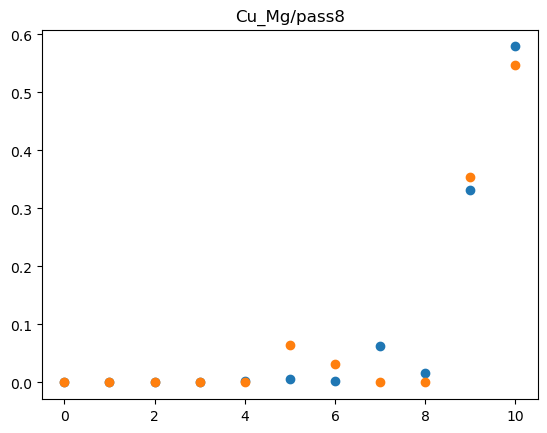

In [22]:
x = np.arange(11)
for i in df3.index:
    array = df3[['name', 'p', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].iloc[i].values
    title = array[0]
    p = array[1]
    fracs = array[2:]
    plt.scatter(x, Qij(p))
    plt.scatter(x, fracs)
    plt.title(title)
    plt.show()